In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Get the Data

In [2]:
df = pd.read_csv('Ecommerce_Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

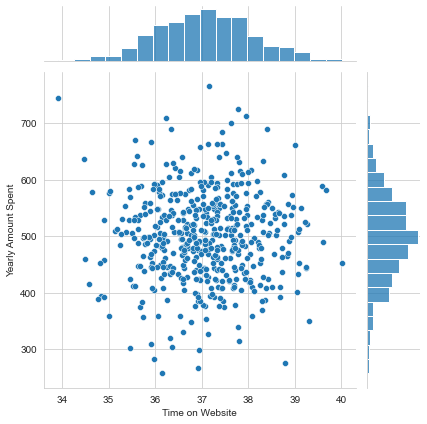

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

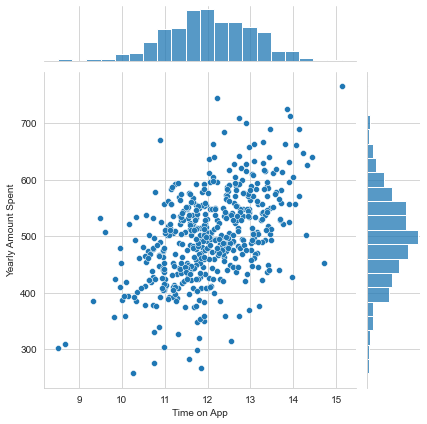

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

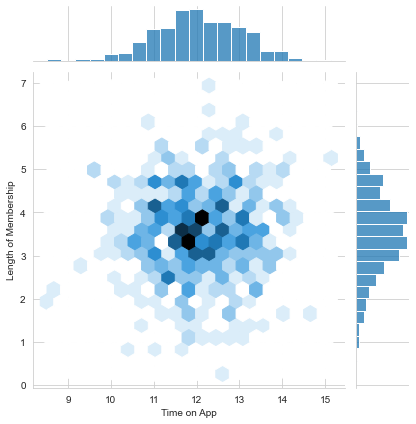

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

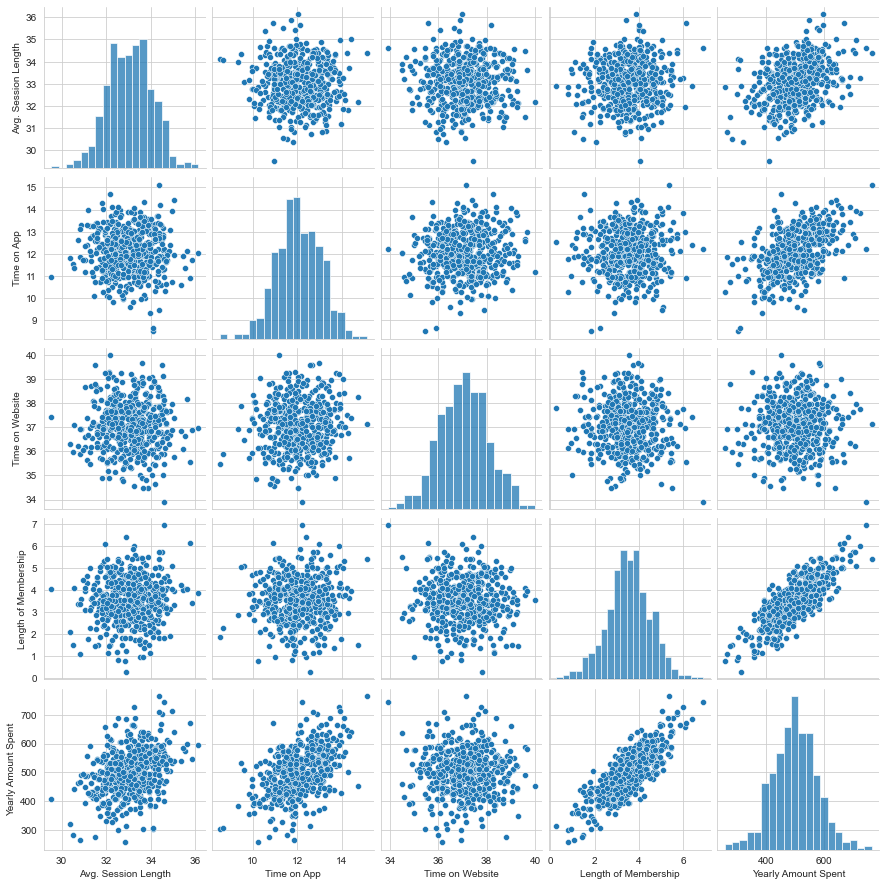

In [9]:
sns.pairplot(data=df)

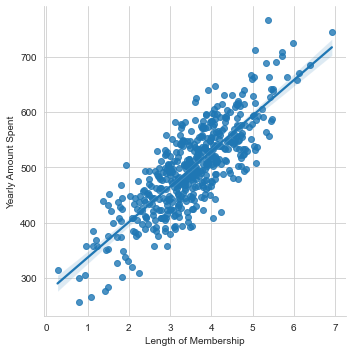

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

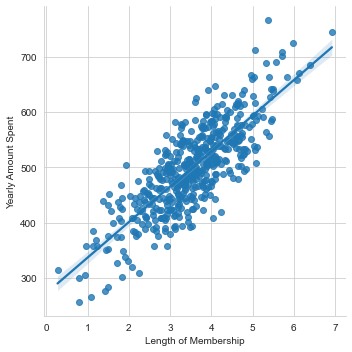

In [11]:
g = sns.FacetGrid(df, height=5)
g.map(sns.regplot, 'Length of Membership', 'Yearly Amount Spent')

## Training Test Split

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.3, random_state=101)

In [18]:
# convert pandas dateframe to numpy 2d array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Training the Model

**Train/fit linear model on the training data with gradient descent.**

In [19]:
def check_grad(X, y, w): # check grad at w
    
    def grad(w):
        N = X.shape[0]
        return 1/N * X.T.dot(X.dot(w) - y)
    
    def cost(w):
        N = X.shape[0] 
        return .5/N * (np.linalg.norm(y - X.dot(w)))**2
    
    num_grad = np.zeros_like(w) # numerical grad at w
    eps = 1e-6
    numElems = w.shape[0]
    # calculate the numerical gradient
    for i in range(numElems):
        w1 = w.copy()
        w2 = w.copy()
        w1[i] += eps
        w2[i] -= eps
        num_grad[i] = (cost(w1) - cost(w2))/(2*eps)
        
    diff = np.linalg.norm(num_grad - grad(w))
    print(f'Difference between two methods is {diff}')        

In [20]:
def GD(X_train, y_train, w_init, eta=0.05): # eta is learning rate
    
    def grad(w):
        N = X_train.shape[0]
        return 1/N * X_train.T.dot(X_train.dot(w) - y_train)
    
    def cost(w):
        N = X_train.shape[0]
        return .5/N * (np.linalg.norm(y_train - X_train.dot(w)))**2

    w = w_init
    c = [cost(w_init)] # a vector saving the history of cost values
    
    # w = w - eta*grad(w)
    for it in range(100):
        w = w - eta*grad(w)
        c.append(cost(w))
        
    return (w, c)

In [21]:
one = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((one, X_train), axis=1)
y_train = y_train.reshape((y_train.shape[0], 1))
w_init = np.zeros((X_train.shape[1], 1))
learningRate = 0.07

In [22]:
check_grad(X_train, y_train, w_init)

Difference between two methods is 1.888900536406357e-05


In [23]:
w, cost = GD(X_train, y_train, w_init, learningRate)

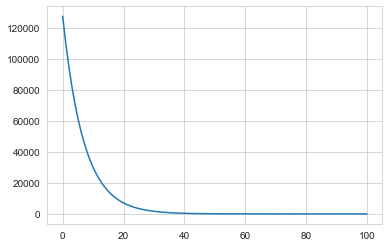

In [24]:
plt.plot(cost)

**Print out the coefficients of the model**

In [39]:
print(f'Intercept/Bias: \n {w[0]}')

Intercept/Bias: 
 [499.14966643]


In [40]:
print(f'Coefficients: \n {w[1:].reshape(-1)}')

Coefficients: 
 [25.64364198 38.13945278  0.33825396 61.19797678]


## Predicting Test Data

In [27]:
one = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((one, X_test), axis=1)
predictions = np.dot(X_test, w)
predictions = predictions.reshape(-1)

Text(0, 0.5, 'Predicted values')

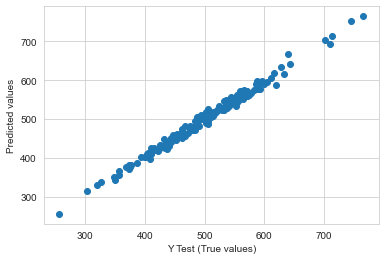

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')

## Evaluating the Model

In [29]:
from sklearn import metrics

In [30]:
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

MAE: 7.194194573703277
MSE: 79.22016707911155
RMSE: 8.900571165892195


In [31]:
metrics.explained_variance_score(y_test, predictions) # R2 score

0.9891005220504878

<AxesSubplot:ylabel='Count'>

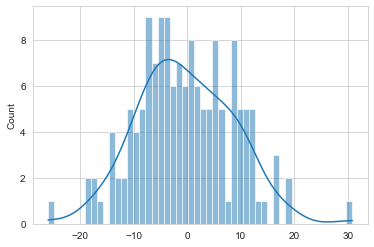

In [32]:
sns.histplot((y_test-predictions), kde=True, bins=50)

In [33]:
cdf = pd.DataFrame(w[1:], X.columns, columns=['Coeffecient'])
cdf

,Coeffecient
Avg. Session Length,25.643642
Time on App,38.139453
Time on Website,0.338254
Length of Membership,61.197977
